### Import relevant modules

In [231]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Read data

In [232]:
df = pd.read_csv('data/Automobile price data _Raw_.csv')
df.replace('?',0, inplace=True)                                     # Replace '?' with '0' in dataset
# df.set_index('symboling', inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Prepare train & test data sets

In [279]:
X = df.iloc[:,:-1]
X.drop(['engine-location'],axis=1,inplace=True)
X = pd.get_dummies(X, columns=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',\
                            'engine-type','num-of-cylinders','fuel-system'], drop_first=True)
y = df.iloc[:,-1:]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3)

type(X), X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

(pandas.core.frame.DataFrame,
 (205, 65),
 (205, 1),
 (143, 65),
 (62, 65),
 (143, 1),
 (62, 1))

### Train & test ML models

In [280]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print ('Score (train) = {}%'.format(np.around(linreg.score(X_train, y_train),decimals=4)*100))
print ('Score (test) = {}%'.format(np.around(linreg.score(X_test, y_test),decimals=4)*100))
val = X_test.iloc[:1,:]
p1 = linreg.predict(val)
p = linreg.predict(X_test)

Score (train) = 95.49%
Score (test) = 85.76%


### Visualize scores

In [281]:
y_test.values.shape, p.shape
# y_test

((62, 1), (62, 1))

In [282]:
from sklearn import preprocessing
min_max_scalar = preprocessing.MinMaxScaler()
y_test.values_minmax = min_max_scalar.fit_transform(y_test.values)
p_minmax = min_max_scalar.fit_transform(p)

C:\Users\erb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\erb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [283]:
y_test.values_minmax.shape, p_minmax.shape

((62, 1), (62, 1))

In [284]:
y_test.loc[:,'price'] = pd.to_numeric(y_test.loc[:,'price'], errors='coerce')
price_predict = y_test
price_predict['prediction'] = p
price_predict['predict_price_delta'] = ((price_predict['prediction'] - price_predict['price'])/price_predict['price'])*100
price_predict.head()

C:\Users\erb\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\erb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\erb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,price,prediction,predict_price_delta
53,6695,7300.393423,9.042471
179,15998,18072.706873,12.968539
141,7126,10031.287081,40.770237
1,16500,19531.631696,18.373525
146,7463,10530.161257,41.098235


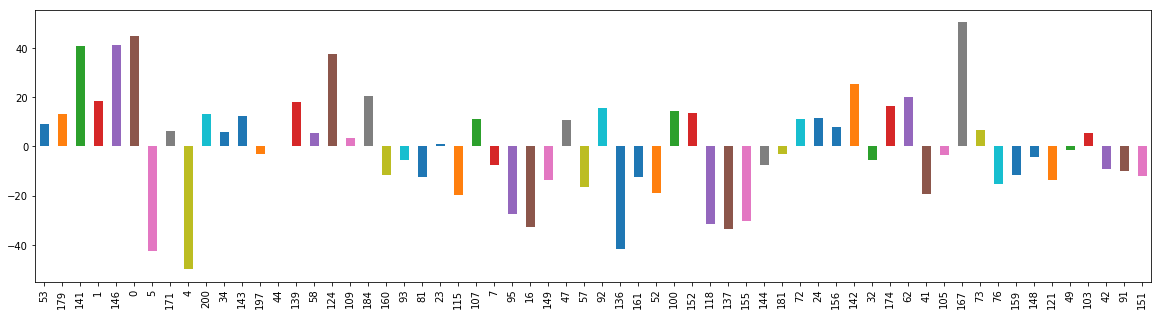

In [285]:
price_predict['predict_price_delta'].plot.bar(figsize=(20,5))